In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1

In [ ]:
df = pd.read_csv("shop.csv")

# Calculate all sales
df["total_sales"] = df["price"] * df["quantity"]
sales_per_product = df.groupby("product")["total_sales"].sum()

# Calculate quantity
quantity_per_product = df.groupby("product")["quantity"].sum()
best_selling_product = quantity_per_product.idxmax()
best_selling_quantity = quantity_per_product.max()

least_selling_product = quantity_per_product.idxmin()
least_selling_quantity = quantity_per_product.min()

# Average sale per days
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
daily_sales = df.groupby("date")["total_sales"].sum()
average_daily_sales = daily_sales.mean()

# Result
print("ยอดขายรวมของแต่ละสินค้า:\n", sales_per_product) # 1.1
print(f"\nสินค้าที่ขายดีที่สุด: {best_selling_product} ({best_selling_quantity} ชิ้น)") # 1.2
print(f"สินค้าที่ขายได้น้อยที่สุด: {least_selling_product} ({least_selling_quantity} ชิ้น)") # 1.3
print(f"ยอดขายเฉลี่ยต่อวัน: {average_daily_sales:.2f} บาท") # 1.4

ยอดขายรวมของแต่ละสินค้า:
 product
bread         5403
fruits        7084
ice           5481
icecream      6869
soft drink    5954
Name: total_sales, dtype: int64

สินค้าที่ขายดีที่สุด: bread (190 ชิ้น)
สินค้าที่ขายได้น้อยที่สุด: ice (163 ชิ้น)
ยอดขายเฉลี่ยต่อวัน: 3079.10 บาท


# 2

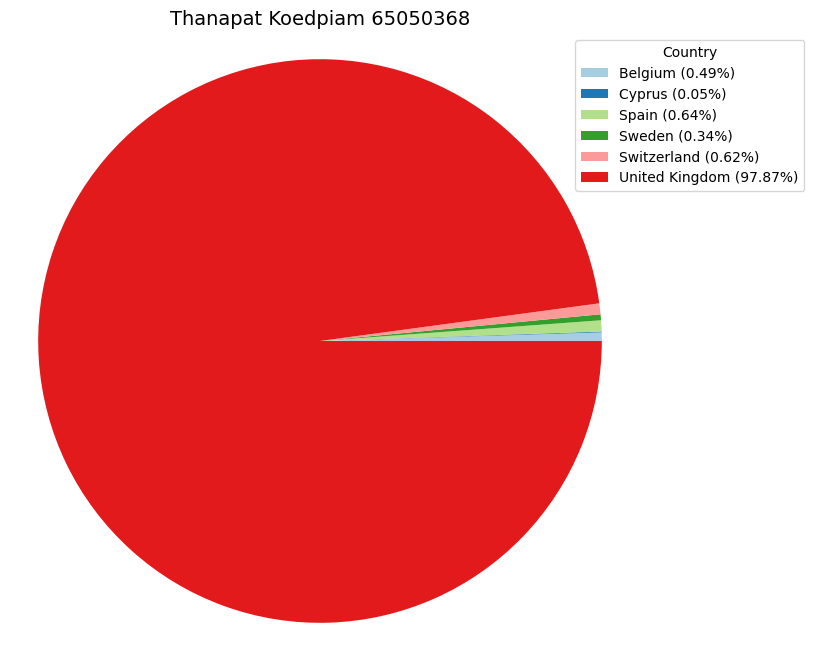

In [ ]:
df = pd.read_csv("retail.csv"  )

selected_countries = ["United Kingdom", "Sweden", "Spain", "Cyprus", "Belgium", "Switzerland"]
filtered_df = df[df["Country"].isin(selected_countries)].copy()

filtered_df["Total Sales"] = filtered_df["Price"] * filtered_df["Quantity"]
sales_per_country = filtered_df.groupby("Country")["Total Sales"].sum()

sizes = sales_per_country / sales_per_country.sum() * 100
labels = sales_per_country.index

colors = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#F4D03F", "#8E44AD"]

plt.figure(figsize=(8, 8))
wedges, _ = plt.pie(
    sales_per_country,
    colors=plt.cm.Paired.colors
)

legend_labels = [f"{l} ({s:0.2f}%)" for l, s in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="Country", bbox_to_anchor=(0.9, 1), loc="upper left")

plt.title("Thanapat Koedpiam 65050368", fontsize=14)
plt.axis('equal')
plt.show()